<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [25]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests 

import warnings
warnings.filterwarnings('ignore')

In [27]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [28]:
# текст запроса
# лучше использовать f-строки — так удобнее передавать параметры
query_3_1 = f'''select
                    count(*) 
                from vacancies
                ;
            '''
            


In [29]:
# результат запроса
# используем метод read_sql_query, чтобы получить результаты запроса сразу в виде датафрейма
df = pd.read_sql_query(query_3_1, connection)
display(df)

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''select
                    count(*) 
                from employers
            '''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

,count
0,23501


In [8]:
# SQL запрос подсчитывает количество записей (строк) в таблице "employers".
# Команда COUNT() возвращает число строк в указанной таблице. 
# Результат выполнения этого SQL запроса будет - количество строк в таблице "employors"
# Аналогичный подсчет произведен в SQL запросах; по вакансиям, по регионам, по сферам деятельности.



3. Посчитате с помощью запроса количество регионов (таблица areas).

In [9]:
# текст запроса
query_3_3 = f'''select
                    count(*) 
                from areas
            '''

In [10]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [11]:
# текст запроса
query_3_4 = f'''select
                    count(*) 
                from industries
            '''

In [12]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

,count
0,294


### выводы по предварительному анализу данных
*С помощью предварительного анализа данных в SQL запросе мы узнали что из себя представляют данные и насколько они соответствуют целям нашего проекта. Мы получили данные о количестве вакансий(49 197) , о количестве работодателей(23 501), о количестве регионов(1362) и количестве сфер деятельности этих работодателей(294).*


***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [20]:
# текст запроса
query_4_1 = f'''select  a.name  area,  count(v.id) cnt
                from vacancies v
                join areas a on a.id = v.area_id
                group by a.name
                order by cnt desc
                limit 5;
            '''

In [21]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
print("Первые пять городов с наибольшим колличеством вакансий")
display(df)

Первые пять городов с наибольшим колличеством вакансий


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


In [2]:
# Этот SQL-запрос выполняет следующие действия:
# from vacancies v join areas a on a.id = v.area_id : Из таблицы vacancies (с псевдонимом v) делается 
# соединение с таблицей areas с псевдонимом a) по общему полю id в areas и area_id в vacancies. Это значит, 
# что каждой вакансии будет соответствовать  определённая область (area).
# select a.name area, count(v.id) cnt : После соединения таблиц, выбираются колонки a.name (имя области) 
# и подсчитывается количество v.id (количество вакансий в каждой области) и сохраняется в новую колонку cnt.
# group by a.name : Результаты группируются по имени области. Это значит, что для каждой уникальной области 
# будет подсчитано количество связанных с ней вакансий.
# order by cnt desc : Результаты сортируются по колонке cnt в порядке убывания, т.е. области с большим 
# количеством вакансий будут отображаться первыми.
# limit 5 : Запрос выводит только первые 5 записей. Это будут 5 регионов с наибольшим количеством вакансий.


**Вывод,** *пятерка лидеров по количеству вакансий: Москва(5333), Санкт-Петербург(2851), Минск(2112), Новосибирск(2006), Алматы(1892).*

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [22]:
# текст запроса
query_4_2 = f'''select count(*)
                from vacancies v
                where v.salary_from   is not null or
                      v.salary_to     is not null;
            '''

In [23]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

,count
0,24073


**Выводом,** *этого SQL-запроса будет количество записей в таблице "vacancies", для которых указана зарплата (либо в столбце «salary_from», либо в столбце «salary_to»).*

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [24]:
# текст запроса
query_4_3 = f'''select round (avg(v.salary_from))::int  as avg_lower_limit,
                       round (avg(v.salary_to))::int  as avg_upper_limit
                from vacancies v;
            '''

In [25]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

,avg_lower_limit,avg_upper_limit
0,71065,110537


In [4]:
# этот код SQL вычисляет средний нижний и верхний пределы заработной платы из таблицы «вакансии» и 
# отображает их в виде двух столбцов с именами «avg_lower_limit» и «avg_upper_limit» соответственно. 
# Значения в этих столбцах будут целыми числами, представляющими округленные средние значения столбцов 
# «salary_from» и «salary_to» из таблицы «vacancies».


**Вывод,** *этот SQL запрос вернет средний нижний предел и средний верхний предел диапазонов заработной платы в таблице «вакансии» в виде целых чисел.*

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [26]:
# текст запроса
query_4_4 = f'''select v.schedule , 
                        v.employment, 
                        count(*) cnt
                from vacancies v
                group by v.schedule,
                         v.employment  
                order by cnt desc;
            '''

In [27]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


In [28]:
# посмотрим на лучшие варианты графика работы и типов занятости с наибольшим кол-ом вакансий
df.head()

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940


In [5]:
# В целом этот код подсчитывает количество вакансий для каждой уникальной комбинации графика работы и типа занятости, 
# а затем сортирует эти значения в порядке убывания. Это может быть полезно для понимания распределения вакансий
# на основе этих двух атрибутов.

In [29]:
# Посмотрим на статистическую сводку для столбца vacancies 
df.describe()

,cnt
count,18.000000
mean,2733.166667
std,8342.368420
min,1.000000
25%,73.250000
50%,226.500000
75%,847.250000
max,35367.000000


<Axes: >

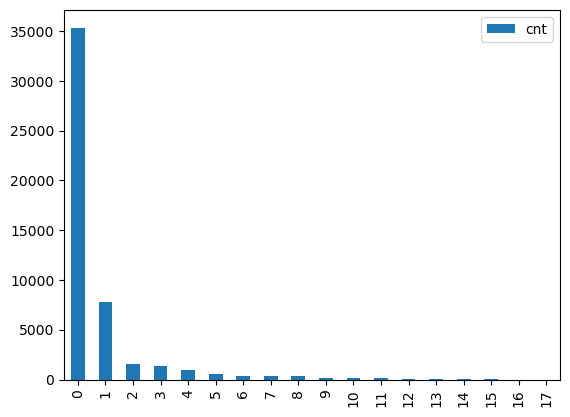

In [30]:
# Визуальный анализ распределения количества вакансий по типу рабочего графика работы и типу трудоустройства
df.plot.bar()

#### Рассмотрим нашу предполагаемую гистограмму:
*На гистограмме отображается количество вакансий (ось Y) для каждой комбинации типа графика работы(schedule) и типа занятости(employment) (ось Х). Если полоса c «Полная занятость, полный рабочий день» значительно выше других, то можем сделать вывод, что вакансий для постоянных должностей с полной занятостью больше, чем для любого другого типа в нашем наборе данных. Если у одной комбинации, например, «Сменный график, Полная занятость» имеется очень короткая полоса, это говорит о том, что вакансий данного типа мало.*

*Наша гистограмма помогает быстро определить, какая комбинация Schedule и Employment имеет больше или меньше вакансий, что может быть полезно для соискателей работы или анализа кадров.*

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [31]:
# текст запроса
query_4_5 = f'''select v.experience, 
                        count(*) cnt
                from vacancies v
                group by v.experience  
                order by cnt asc;
            '''


In [32]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [6]:
# в целом этот код подсчитывает количество вакансий для каждого уникального уровня опыта и 
# сортирует это количество в порядке возрастания. Это может быть полезно для понимания количества вакансий 
# для каждого уровня опыта.


In [33]:
df.describe()

,cnt
count,4.000000
mean,12299.250000
std,10692.589346
min,1337.000000
25%,5732.000000
50%,10854.000000
75%,17421.250000
max,26152.000000


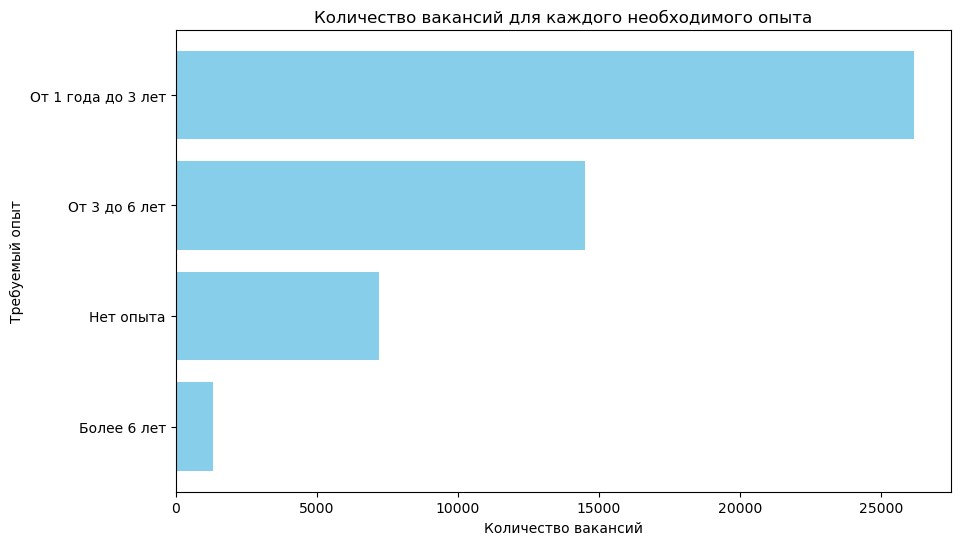

<Figure size 1000x600 with 0 Axes>

In [34]:
# Этот оператор SQL выберет поле «experience» и подсчитает количество вакансий для каждого уникального «cnt». 
# Затем он упорядочивает результаты в порядке возрастания количества вакансий


import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(10,6))

# Создаем гистограмму
plt.barh(df['experience'], df['cnt'], color='skyblue')

# Добавьте заголовок и метки
plt.title('Количество вакансий для каждого необходимого опыта')
plt.xlabel('Количество вакансий')
plt.ylabel('Требуемый опыт')

plt.figure(figsize=(10,6))

# Отображение гистограммы
plt.show()

***

### Рассмотрим нашу предполагаемую гистограмму:
*Этот код создает горизонтальную гистограмму с «Требуемым опытом» по оси Y и «Количество вакансий» по оси X. Каждая полоса представляет собой уникальный необходимый опыт, а длина полосы соответствует количеству вакансий. Название графика и метки осей указаны для ясности.* 
*Наша гистограмма иллюстрирует количество вакансий для каждого необходимого опыта и выявляет различные закономерности. Например, уровень опыта "более 6 лет" имеет наименьшее количество вакансий, что говорит о том, что он либо не часто требуется, либо насыщен работниками. А вот уровень опыта работы "от 1 до 3-х лет" наоборот- высокий спрос на таких соискателей.*

### выводы по детальному анализу вакансий

1. Мы определили пятерку лидеров по количеству вакансий: Москва (5333), Санкт-Петербург(2851), Минск(2112),        Новосибирск(2006) и Алматы(1892) ;
2. Вычислили количество вакансий с информацией о зарплате (либо минимальная, либо максимальная, либо обе);
3. Вычислили средний нижний предел и средний верхний предел диапазонов заработной платы из таблицы «вакансии» и    отобразили их в виде двух столбцов с именами «avg_lower_limit» и «avg_upper_limit» соответственно;
4. Подсчитали количество вакансий для каждой уникальной комбинации графика работы и типа занятости, и узнали,      что вакансий для постоянных должностей с полной занятостью больше (35 367), чем для любого другого типа        занятости и графика работы в нашем наборе данных;
5. Подсчитали количество вакансий для каждого уникального уровня опыта работы, и обнаружили, что уровень опыта    работы "более 6 лет"(1337) имеет наименьшее количество вакансий, что говорит о том, что он либо не часто        требуется, либо насыщен работниками. 
   А вот уровень опыта работы "от 1 до 3-х лет"(26 152) наоборот - высокий спрос на таких соискателей, так и      хочется предположить, что компания готовит свой резев работников, на перспективу.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [13]:

import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests 
# убрать предупреждения
import warnings
warnings.filterwarnings('ignore')



connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)


# текст запроса
query_5_1 = f'''select e.name, count(v.id)
                from vacancies v left join employers e on v.employer_id = e.id
                group by e.name
                order by count(v.id) desc
                limit 5;
             '''

In [14]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


In [ ]:
# SQL-запрос выбирает 5 работодателей с наибольшим числом вакансий: лидер-это Яндекс, и замыкает пятерку- Газпром нефть

Text(0.5, 1.0, 'Топ-5 работодателей с самым большим количеством публикуемых вакансий')

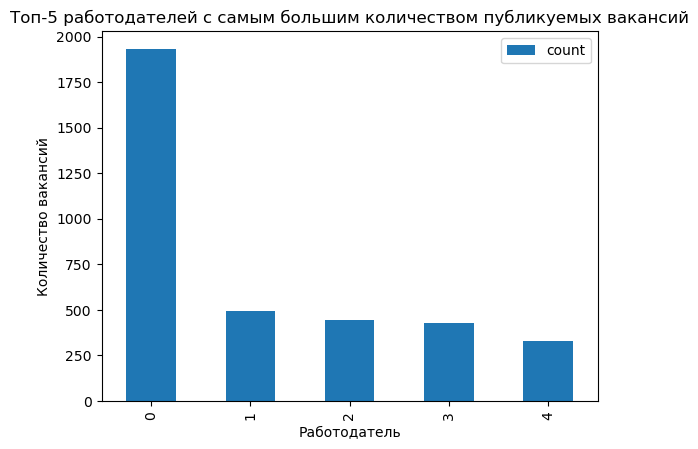

In [37]:
df.describe()

df.plot.bar()
plt.ylabel ('Количество вакансий')
plt.xlabel ('Работодатель')
plt.title ('Топ-5 работодателей с самым большим количеством публикуемых вакансий')



#plt.show()

*По результатам нашего исследования данных где SQL запрос определил 5 лучших работодателей с наибольшим количеством опубликованных вакансий, можно сказать что такие работодатели как Яндекс пользуется наибольшим спросом на объявления о вакансиях, и в главной пятерке таких работодателей- это Ростелеком, Тинькофф, СБЕР, Газпром нефть.*

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [38]:
# текст запроса
query_5_2 = f'''select a.name, count(distinct e.id) cnt_emp, count(distinct v.id) cnt_vac
                from areas a left join employers e on a.id = e.area
                             left join vacancies v on v.area_id = a.id
                where v.id is null
                group by a.id
                order by cnt_emp desc;
            '''

In [39]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

,name,cnt_emp,cnt_vac
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


In [ ]:
# SQL-запрос выбирает данные из базы данных с таблицами «регионы», «работодатели» и «вакансии», 
# объединяет эти таблицы для получения информации о регионах, количестве отдельных работодателей
# в каждом регионе и количестве отдельных вакансий в каждом регионе где вакансий нет (v.id имеет значение null). 
# Затем результаты группируются по идентификатору региона и
# сортирует по количеству различных работодателей в порядке убывания.


**Вывод,** *запрос вернет список регионов с количеством отдельных работодателей в каждом регионе, но только для регионов, где нет вакансий.*


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [40]:
# текст запроса
query_5_3 = f'''select e.name, count(distinct a.id) as cnt_areas
                from employers e join vacancies v on e.id = v.employer_id
                                  join areas a on v.area_id =a.id
                group by e.name
                order by count(distinct a.id) desc
                limit 10
             '''

In [41]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

,name,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


In [7]:
# SQL запрос - для получения списка из 10 работодателей (e.name) 
# с наибольшим количеством уникальных областей (cnt_areas), где у них есть вакансии.


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [42]:
# текст запроса
query_5_4 = f'''select count(distinct e.id)
                from employers e left join employers_industries e_ind on e.id = e_ind.employer_id
                                 left join industries i on e_ind.industry_id = i.id
                where i.id is null
                ;
             '''

In [43]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

,count
0,8419


**Вывод,** *результатом этого запроса будет количество работодателей без связанных отраслей. Из 23 501 работодателей заявленных в нашей базе данных, 8419 работодателей не указывают свою сферу деятельности (жалко что ли, могли бы облегчить задачу и для соискателей и для разработчика "Модели....")*

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [15]:
# текст запроса
query_5_5 = f'''select e.name, count(*) cnt
                from employers e join employers_industries ei on ei.employer_id = e.id
                group by e.id
                having count(*) = 4
                order by e.name asc
                limit 1 offset 2
                ;            
            '''

In [16]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

,name,cnt
0,2ГИС,4


**Вывод,** *этот запрос находит работодателей, которые связаны ровно с четырьмя отраслями, и возвращает имя третьего работодателя в алфавитном порядке среди тех, кто соответствует этому критерию.*



6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [17]:
# текст запроса
query_5_6 = f'''select count(*) cnt
                from employers_industries e_i 
                join industries i on e_i.industry_id = i.id
                where name = 'Разработка программного обеспечения'
                ;
            '''

In [18]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

,cnt
0,3553


In [19]:
# SQL-запрос выбирает количество строк из таблицы «employers_industries», 
# где название отрасли — «Разработка программного обеспечения». Он объединяет таблицу «employers_industries» 
# с таблицей «industries» в столбце «industry_id», чтобы получить название отрасли


**Вывод,** *SQL запрос вернул одну строку с количеством записей в таблице «employers_industries», связанных с отраслью «Разработка программного обеспечения». Наш результат - в столбце «cnt». Из 23 501 числа работодателей только 3553 работодателя указывают свою сферу деятельности, а именно "Разработка програмного обеспечения".*

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [20]:

import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import requests 
# убрать предупреждения
import warnings
warnings.filterwarnings('ignore')



connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)


# код для получения списка городов-милионников

url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
ds_city = pd.read_html(url)
cities = ds_city[1]
cities

,№,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел. (итоги переписи 2010 года)[6]"
0,1,Москва,13 098,13 010,"13,1 %",11 504
1,2,Санкт-Петербург,5 598,5 602,"14,8 %",4 880
2,3,Новосибирск,1 635,1 634,"10,9 %",1 474
3,4,Екатеринбург,1 539,1 544,"14,4 %",1 350
4,5,Казань,1 315,1 309,"14,4 %",1 144
5,6,Нижний Новгород,1 213,1 226,NaN,1 251
6,7,Красноярск,1 197,1 188,"21,6 %",977
7,8,Челябинск,1 183,1 190,"5,3 %",1 130
8,9,Самара,1 164,1 173,"0,3 %",1 169
9,10,Уфа,1 158,1 145,"7,8 %",1 062


In [21]:
# текст запроса
city = list(cities['Город'])

city = tuple(city)

query_5_7 = f'''with total as (select a.name, count(v.id) as cnt_vacancies
                               from vacancies v join areas a on v.area_id = a.id
                                                join employers e on v.employer_id = e.id
                               where e.name = 'Яндекс' and a.name in {city}
                               group by a.name
                               )

                (select a.name, count(v.id) as cnt_vacancies
                from vacancies v join areas a on v.area_id = a.id
                                  join employers e on v.employer_id = e.id
                where e.name = 'Яндекс' and a.name in {city}
                group by a.name
                )
                
                union all
                
                select 'Total', sum(cnt_vacancies)
                from total
                
                order by 2 
                ;
             '''

In [11]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

,name,cnt_vacancies
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


***

**Вывод,** *данный SQL запрос извлек для нас информацию о вакансиях на «Яндекс» в различных городах, включая количество отдельных городов и общее количество. Из полученной информации ясно, что в регионах России есть вакансии и топовый работодатель это Яндекс. Однако в целом Россия также попадает в число стран без вакансий и с наибольшим числом работодателей.*


### выводы по анализу работодателей

*Анализ работодателей дает ценную информацию о рынке труда и возможности трудоустройства, дает представление об отраслях активно нанимающих специалистов по данным:*
- SQL запрос помог определить отрасли и компании которые активно нанимают работников,на примере пяти топовых     работодателей с наибольшим количеством опубликованных вакансий;
- определил в каких регионах больше вакансий, на примере списка из 10 работодателей, у которых наибольшее         количество уникальных регионов и с вакансиями;
- SQl запрос подсчитал количество работодателей, которые связаны с отраслью разработки программного               обеспечения;
- SQL запрос извлек для нас информацию о вакансиях на «Яндекс» в различных городах, включая количество           отдельных городов и общее их количество;

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [22]:
# текст запроса
query_6_1 = f'''select count(id)
                from vacancies
                --функция lower приводит все символы в строке к нижнему регистру, чтобы поиск был нечувствителен к регистру
                where lower(name) like '%data%' or lower(name) like '%данн%'
                ;
             '''

In [23]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
display(df)

,count
0,1771


In [24]:
# SQL-запрос выбирает из таблицы vacancies все идентификаторы вакансий и подсчитывает их
# условие фильтрует только те вакансии, название которых содержит подстроку "data" или "данн"
# Оператор LIKE используется для сравнения строковых значений. Символ % является символом подстановки,
# который заменяет любое число символов.
# lower() - это функция, которая преобразует все заглавные буквы в строке в строчные буквы. 
# Это делается для выполнения поиска без учета регистра


**Вывод,** *данный запрос возвращает количество вакансий (1771), в названии которых есть "data" или "данн".*

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [14]:
# текст запроса
query_6_2 = f'''select count(id)
                from vacancies v
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' 
                or lower(v.name) like '%исследователь данных%' or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%%' or (v.name like '%ML%' and v.name not like '%HTML%'))
                and (lower(v.name) like '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
                ;
             '''

In [15]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
display(df)

,count
0,51


**Вывод,** *этот запрос подсчитает количество строк в таблице «вакансии», где название должности содержит ключевые слова, связанные с наукой о данных или машинным обучением, и где опыт или тип занятости соответствуют указанным критериям.*

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [16]:
# текст запроса
query_6_3 = f'''select count(id)
                from vacancies v
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' 
                or lower(v.name) like '%исследователь данных%' or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%%' or (v.name like '%ML%' and v.name not like '%HTML%'))
                and (key_skills like '%SQL%' or key_skills like '%postgres%')
                ;
             '''

In [17]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
display(df)

,count
0,201


**Вывод,** *данный SQL запрос используется для поиска вакансий на должности, связанные с наукой о данных и машинным обучением, требующие навыков SQL или PostgreSQL.*


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [18]:
# текст запроса
query_6_4 = f'''select count(id)
                from vacancies v
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' 
                or lower(v.name) like '%исследователь данных%' or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%%' or (v.name like '%ML%' and v.name not like '%HTML%'))
                and key_skills like '%Python%'
                ;
             '''

In [19]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
display(df)

,count
0,351


**Вывод,** *результатом этого SQL запроса будет общее количество вакансий, в которых Python является обязательным навыком.*

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [20]:
# текст запроса
query_6_5 = f'''select
                --вычисляем среднее количество ключевых навыков, указанных в поле key_skills
                round(avg(length(key_skills) - length(replace(key_skills, '\t', '')) + 1), 2) as avg_skills
                --таблица vacancies, из которой извлекаются данные
                from vacancies v
                --Это условие фильтрует строки таблицы, выбирая только те, 
                --в которых поле name содержит определенные ключевые слова или фразы 
                --или содержит 'ML' и НЕ содержит 'HTML'
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' 
                or lower(v.name) like '%исследователь данных%' or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%%' or (v.name like '%ML%' and v.name not like '%HTML%'))
            ;
        '''

In [21]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
display(df)

,avg_skills
0,6.41


**Вывод,** *данный SQL-запрос вычисляет среднее количество ключевых навыков, указанных в поле key_skills для вакансий, соответствующих определенным критериям, связанных с наукой о данных и машинным обучением. Для работодателя достаточно 6 ключевых навыков которыми должен обладать соискатель ны должность DS.*

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [22]:
# текст запроса
query_6_6 = f'''select  experience, round(avg(case when salary_from is null or salary_to is null then
                                                        coalesce(salary_from, 0) + coalesce(salary_to, 0)
                                              else ((coalesce(salary_from, 0) + coalesce(salary_to, 0))/2) end)) as avg_salary
                from vacancies v
                where (lower(v.name) like '%data scientist%' or lower(v.name) like '%data science%' 
                or lower(v.name) like '%исследователь данных%' or lower(v.name) like '%machine learning%'
                or lower(v.name) like '%машинн%обучен%%' or (v.name like '%ML%' and v.name not like '%HTML%'))
                and (salary_from is not null or salary_to is not null) and experience = 'От 3 до 6 лет'
                group by experience
             '''

In [23]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
display(df)

,experience,avg_salary
0,От 3 до 6 лет,243115.0


***

**Вывод,** *представленный SQL запрос извлек для нас информацию о средней зарплате на должностях, связанных с наукой о данных и машинным обучением, особенно для людей с опытом работы от 3 до 6 лет.*

### выводы по предметному анализу

*Анализ требований работодателей к дата-сайентистам показал нам какие навыки и квалификация востребованы на рынке труда:*
- например, SQL запрос указывает на спрос специалистов по науке о данных и с навыками работы с SQL и PostgreSQL  201 вакансий, а знания Python - 351 вакансий;
- далее SQL запрос определил тенденции средней заработной платы на должностях в области науки о данных, требующих опыта от 3 до 6 лет, чем больше опыт , тем выше запрлата;

*Указанные SQL запросы помогают лучше понять требования работодателей к должностям специалистов по данным, что может быть полезно и для соискателей работы в этой области.*



# Общий вывод по проекту


###### Целью данного проекта было создание Модели машинного обучения для рекомендации вакансий Data Scientist клиентам кадрового агентства.
1. Для начала изучили данные и их соответствие целям проекта. 
2. Далее с использованием SQL запроса извлекли информацию о количестве: 
    - вакансий (49 197), работодателей(23 501),регионов(1362), сфер деятельности(294). 
3. Провели анализ вакансий и работодателей:
    - определили пять ведущих регионов по числу вакансий, это Москва (5333), Санкт-Петербург(2851),                   Минск(2112),      Новосибирск(2006) и Алматы(1892);
    - определили пяти топовых работодателей по числу вакансий это Яндекс(1933), Ростелеком(491), Тинькофф(444),       СБЕР(428) и Газпром нефть(331);
4. SQL запрос извлек информацию требований к опыту и навыкам работы необходимые для должностей специалистов по       данным:
    - для работодателя достаточно 6 ключевых навыков которыми должен обладать соискатель ны должность DS;
    - например, SQL запрос указывает на спрос специалистов по науке о данных и с навыками работы с SQL и             PostgreSQL 201 вакансий, а знания Python - 351 вакансий;
    - подсчитали количество вакансий для каждого уникального уровня опыта работы, и обнаружили, что уровень           опыта работы "более 6 лет"(1337) имеет наименьшее количество вакансий, что говорит о том, что он либо не       часто требуется, либо насыщен работниками. А вот уровень опыта работы "от 1 до 3-х лет"(26 152) наоборот       высокий спрос на таких соискателей, так и хочется предположить, что компания готовит свой резев                 работников, на перспективу.
5. Далее SQL запрос определил тенденции средней заработной платы на должностях в области науки о данных,           требующих опыта от 3 до 6 лет, чем больше опыт , тем выше запрлата.


*Как вариант продолжения исследования я бы подучила свою Модель ML, чтобы она рекомендовала вакансии на основе навыков, опыта и предпочтений соискателя.*
